In [334]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [335]:
df = pd.read_csv('train.csv')

In [336]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,16722,1,170,91.0,120,80,1,1,0,0,1,0
1,20984,1,161,93.0,120,80,2,1,0,0,0,0
2,14398,2,177,82.0,110,80,1,1,1,1,1,0
3,18187,2,169,51.0,140,90,1,2,1,1,1,1
4,21222,1,158,68.0,140,90,1,1,0,0,0,1


In [337]:
df.shape

(47864, 12)

In [338]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [339]:
X = df.drop('cardio', axis=1)
y = df['cardio']

In [340]:
TRAIN_RATIO = 0.8
TEST_RATIO = 0.1
VAL_RATIO = 0.1

In [341]:
X = tf.constant(X)
y = tf.constant(y)

In [342]:
X.shape

TensorShape([47864, 11])

In [343]:
def split_data(data, train_size=TRAIN_RATIO, test_size=TEST_RATIO, val_size=VAL_RATIO):
    DATA_SIZE = len(data)
    train = data[:int(DATA_SIZE * train_size)]
    rest = data[int(DATA_SIZE * train_size):]
    test = rest[:int(DATA_SIZE * test_size)]
    val = rest[int(DATA_SIZE * test_size):]

    print(train.shape, test.shape, val.shape)
    return train, test, val

In [344]:
X_train, X_test, X_val = split_data(X)

(38291, 11) (4786, 11) (4787, 11)


In [345]:
y_train, y_test, y_val = split_data(y)

(38291,) (4786,) (4787,)


In [346]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dense, Dropout, InputLayer, BatchNormalization

In [347]:
input_shape = X_train.shape[1:]
print(input_shape)

(11,)


In [348]:
number_of_samples = 2
model = Sequential([
    InputLayer(input_shape=input_shape),
    Dense(16, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [349]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 16)                192       
                                                                 
 dropout_50 (Dropout)        (None, 16)                0         
                                                                 
 batch_normalization_49 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dense_79 (Dense)            (None, 32)                544       
                                                                 
 dropout_51 (Dropout)        (None, 32)                0         
                                                                 
 batch_normalization_50 (Ba  (None, 32)                128       
 tchNormalization)                                   

In [350]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=SparseCategoricalCrossentropy(),
    metrics='accuracy'
)

In [351]:
hist = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=256,
    epochs=50,
    verbose=2,
    shuffle=True
)

Epoch 1/50


150/150 - 2s - loss: 0.7261 - accuracy: 0.5216 - val_loss: 0.6797 - val_accuracy: 0.5722 - 2s/epoch - 10ms/step
Epoch 2/50
150/150 - 0s - loss: 0.7008 - accuracy: 0.5485 - val_loss: 0.7360 - val_accuracy: 0.5024 - 319ms/epoch - 2ms/step
Epoch 3/50
150/150 - 0s - loss: 0.6752 - accuracy: 0.5856 - val_loss: 0.7755 - val_accuracy: 0.5024 - 315ms/epoch - 2ms/step
Epoch 4/50
150/150 - 0s - loss: 0.6475 - accuracy: 0.6253 - val_loss: 0.8483 - val_accuracy: 0.5024 - 314ms/epoch - 2ms/step
Epoch 5/50
150/150 - 0s - loss: 0.6395 - accuracy: 0.6363 - val_loss: 0.8476 - val_accuracy: 0.5024 - 312ms/epoch - 2ms/step
Epoch 6/50
150/150 - 0s - loss: 0.6327 - accuracy: 0.6458 - val_loss: 0.8191 - val_accuracy: 0.5103 - 321ms/epoch - 2ms/step
Epoch 7/50
150/150 - 0s - loss: 0.6304 - accuracy: 0.6488 - val_loss: 0.7960 - val_accuracy: 0.5500 - 312ms/epoch - 2ms/step
Epoch 8/50
150/150 - 0s - loss: 0.6244 - accuracy: 0.6546 - val_loss: 0.6346 - val_accuracy: 0.6647 - 309ms/epoch - 2ms/step
Epoch 9/50
15

In [352]:
hist_df = pd.DataFrame(hist.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.726066,0.521611,0.679747,0.572175
1,0.700752,0.548510,0.736041,0.502402
2,0.675229,0.585568,0.775520,0.502402
3,0.647503,0.625317,0.848319,0.502402
4,0.639528,0.636338,0.847565,0.502402


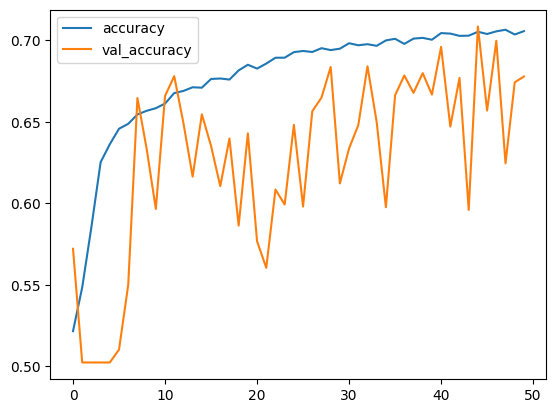

In [353]:
hist_df.loc[:, ['accuracy', 'val_accuracy']].plot();